In [1]:
import seaborn as sns
import pandasql as ps
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
# df = pd.read_csv("_.csv")
# print(df.describe().transpose().head)
# print(df.dtypes)
# query = """select * from df"""
# df = ps.sqldf(query, locals())
%matplotlib inline
sns.set(style="whitegrid", color_codes=True)
np.seterr(divide='ignore', invalid='ignore')

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:278: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

In [7]:
import pandas as pd
df = pd.read_csv("data/annual-sheep-population-1000s-in.csv")
df.rename(index=str, columns={"Year": "year", "Annual sheep population (1000s) in England & Wales 1867 ? 1939": "sheep"}, inplace=True)
df = df[0:73]
df['year'] = df[['year']].apply(lambda row: int(row['year']), axis=1)
from datetime import datetime
df['sqldate'] = df[['year']].apply(lambda row: datetime(year=row['year'], month=1, day=1), axis=1)
df.iloc[0:4]

,year,sheep,sqldate
0,1867,2203.0,1867-01-01 00:00:00
1,1868,2360.0,1868-01-01 00:00:00
2,1869,2254.0,1869-01-01 00:00:00
3,1870,2165.0,1870-01-01 00:00:00


In [8]:
df.describe()

,year,sheep
count,73.000000,73.000000
mean,1903.000000,1856.671233
std,21.217131,222.798617
min,1867.000000,1338.000000
25%,1885.000000,1717.000000
50%,1903.000000,1853.000000
75%,1921.000000,1991.000000
max,1939.000000,2360.000000


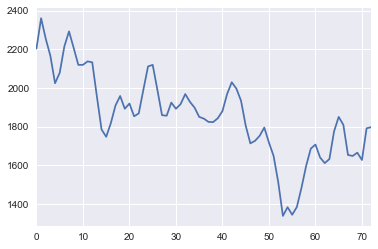

In [14]:
ax = sns.tsplot(data=np.array(df['sheep']))

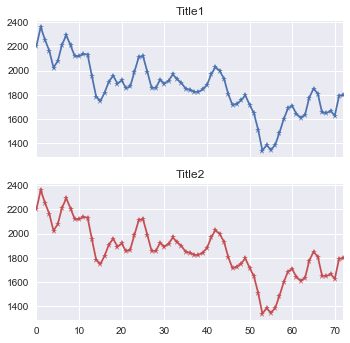

In [27]:
f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(5.5, 5.5)
axarr[0].set_title('Title1')
df['sheep'].plot(linestyle='-', marker='*', color='b', ax=axarr[0])
axarr[1].set_title('Title2')
df['sheep'].plot(linestyle='-', marker='*', color='r', ax=axarr[1])
# plt.savefig('path/file.png', format='png', dpi=300)

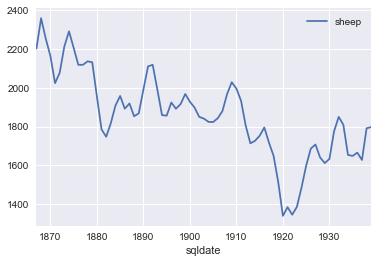

In [39]:
df.plot(y="sheep", x="sqldate")

In [35]:
df.set_index('sqldate')

,year,sheep
sqldate,,
1867-01-01 00:00:00,1867,2203.0
1868-01-01 00:00:00,1868,2360.0
1869-01-01 00:00:00,1869,2254.0
1870-01-01 00:00:00,1870,2165.0
1871-01-01 00:00:00,1871,2024.0
1872-01-01 00:00:00,1872,2078.0
1873-01-01 00:00:00,1873,2214.0
1874-01-01 00:00:00,1874,2292.0
1875-01-01 00:00:00,1875,2207.0
